<a href="https://colab.research.google.com/github/AleksandraJuras2000/Kurs_Udemi/blob/main/06_uczenie_maszynowe/04_regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
sklearn.__version__

'1.6.0'

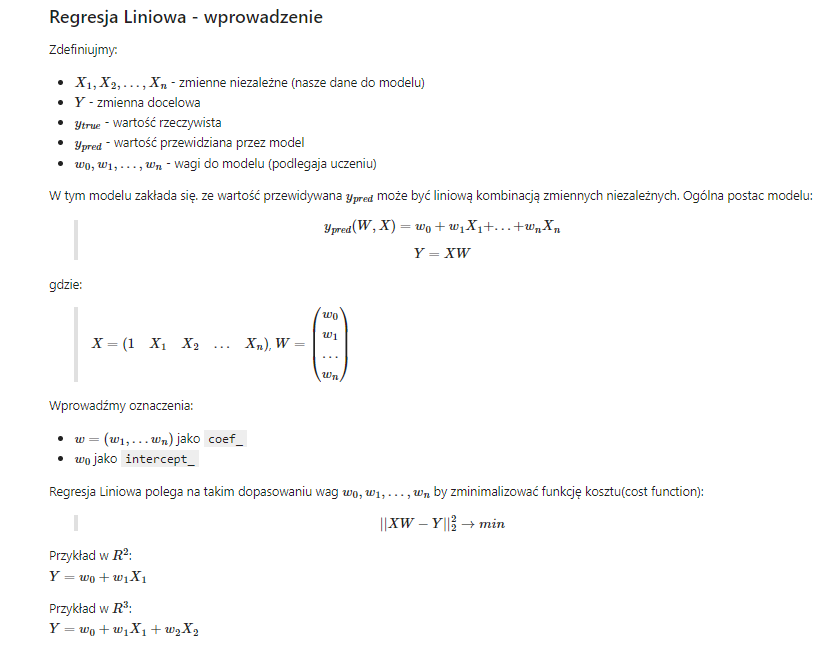

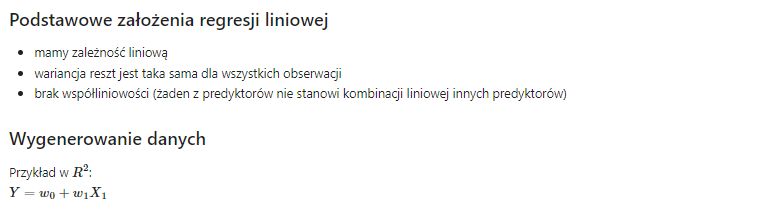

In [3]:
import numpy as np
np.random.seed(10)

X = np.arange(0, 50, 0.5)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)

print('Rozmiar X:',X.shape)
print('Rozmiar y:', y.shape)

Rozmiar X: (100, 1)
Rozmiar y: (100,)


## PODZIAŁ NA ZBIÓR TRENINGOWY I TESTOWY

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train_shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape: (75, 1)
X_test shape: (25, 1)
y_train_shape (75,)
y_test shape (25,)


## WIZUALIZACJA

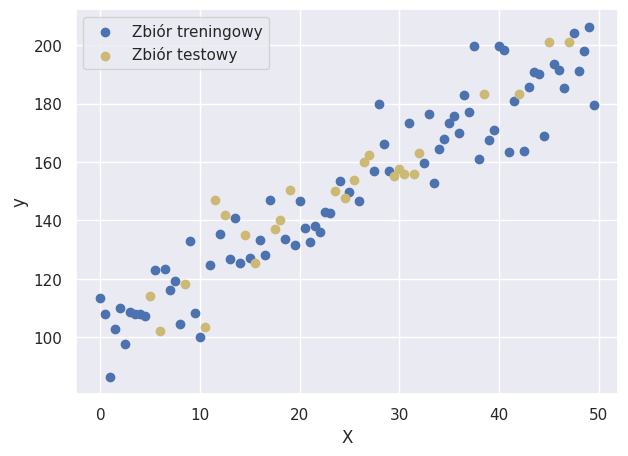

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(7,5))
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')  # c to będzie kolor i b blue a g green
plt.scatter(X_test, y_test, c='y', label='Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
#dane dzielone są w sposób losowy, dobrze sobie wyświetlić ten podział

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # tworzymy instacje tej klasy
lin_reg.fit(X_train, y_train)  # przekazujemy dane

print(lin_reg.coef_)  #wartosć wag
print(lin_reg.intercept_)  #wartość naszego wyrazu wolnego(przeciezie z osia y)
#

[1.93438329]
101.86187237393071


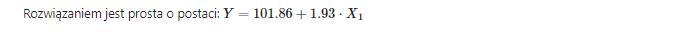

## WIZUALIZACJA ZBIORU TRENINGOWEGO I DOPASOWANEGO MODELU

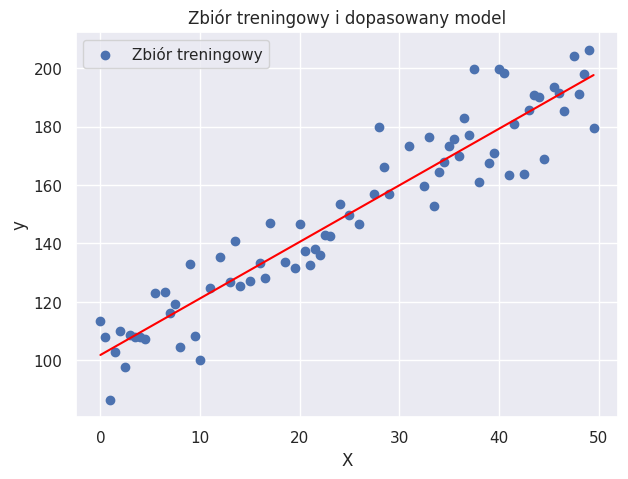

In [9]:
plt.figure(figsize=(7,5))
plt.title('Zbiór treningowy i dopasowany model')
plt.scatter(X_train, y_train, c='b', label='Zbiór treningowy')
plt.plot(X, lin_reg.intercept_+lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

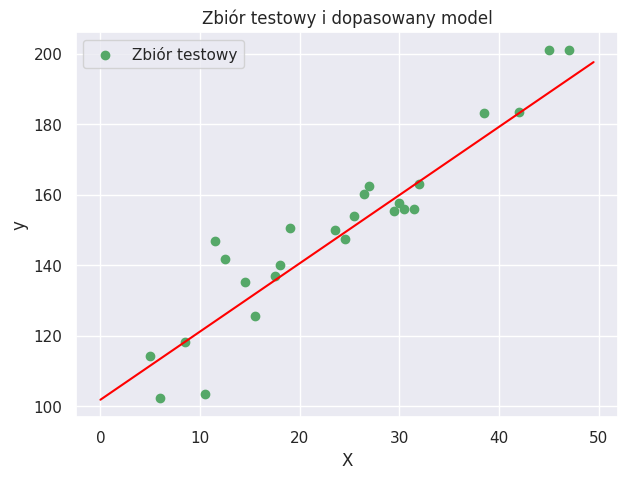

In [13]:
# to samo ale na zbiorze testowym
plt.figure(figsize=(7,5))
plt.title('Zbiór testowy i dopasowany model')
plt.scatter(X_test, y_test, c='g', label='Zbiór testowy')
plt.plot(X, lin_reg.intercept_+lin_reg.coef_[0] * X, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
# na tym modelu sprawdzamy jak sie sprawdza na zbiorze testowym

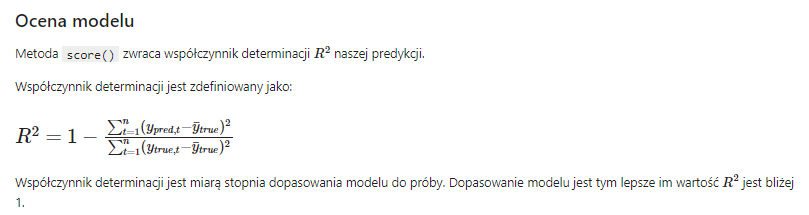



In [14]:
lin_reg.score(X_test, y_test)

0.8773651467468433

In [15]:
lin_reg.score?

## PRZYKLŁAS ZŁEGO ZASTOSOWANIA REGRESJI LINIOWEJ

In [28]:
X = np.arange(-5, 5, 0.5)  # brudnopis
print(type(X))
print(X)
print(X.shape)
X = X.reshape(-1, 1)
print(type(X))
print(X.shape)
X

<class 'numpy.ndarray'>
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]
(20,)
<class 'numpy.ndarray'>
(20, 1)


array([[-5. ],
       [-4.5],
       [-4. ],
       [-3.5],
       [-3. ],
       [-2.5],
       [-2. ],
       [-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5],
       [ 2. ],
       [ 2.5],
       [ 3. ],
       [ 3.5],
       [ 4. ],
       [ 4.5]])

[-2.02010106]
18.179539458280445


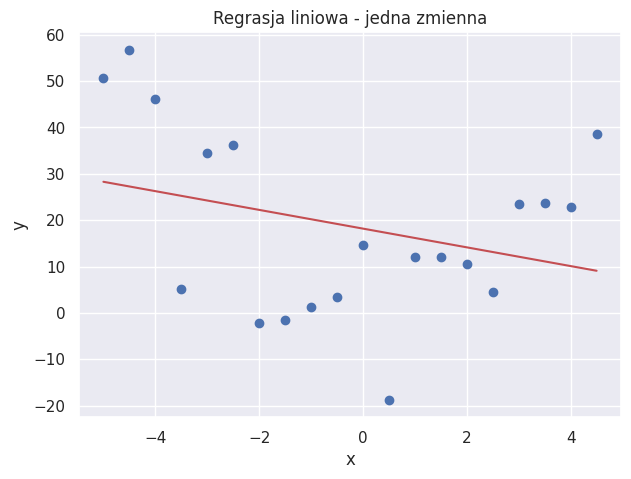

In [29]:
X = np.arange(-5, 5, 0.5)  # jednowymiarowy wektor
noise = 10* np.random.randn(20)
y = 2 * (X ** 2) + 4 + noise
X = X.reshape(-1, 1) # kolumna czyli dwudymiarowa tablica

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

plt.figure(figsize=(7, 5))
plt.scatter(X, y)
plt.plot(X, lin_reg.intercept_+lin_reg.coef_*X, 'r')
plt.title('Regrasja liniowa - jedna zmienna')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# kiedy nie nalezy stosowac.. nasze dane kompletnie nie mają liniowości
#model liniowy słabo sie dostosuje do tych danych
# mamy inne modele np. regresja wielomianowa która może lepiej sie sprawdzic